In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bivariate-data-set-with-3-clusters/xclara.csv


In [2]:
from copy import deepcopy
import numpy as np
import pandas as pd
import math
from numpy import array
import random
from math import exp
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("../input/bivariate-data-set-with-3-clusters/xclara.csv")

cols = [1,2]
data= df[df.columns[cols]]

print(data)

             V1         V2
0      2.072345  -3.241693
1     17.936710  15.784810
2      1.083576   7.319176
3     11.120670  14.406780
4     23.711550   2.557729
...         ...        ...
2995  85.652800  -6.461061
2996  82.770880  -2.373299
2997  64.465320 -10.501360
2998  90.722820 -12.255840
2999  64.879760 -24.877310

[3000 rows x 2 columns]


In [4]:
Z=data.shape[0]               #total no. of data poins
print("number of data points :",Z)

number of data points : 3000


In [5]:
UB=[]
LB=[]

a=data['V1'].max()
b=data['V1'].min()
c=data['V2'].max()
d=data['V2'].min()
UB.append(a)
UB.append(c)

LB.append(b)
LB.append(d)
print(a,b,c,d)

104.3766 -22.49599 87.3137 -38.7955


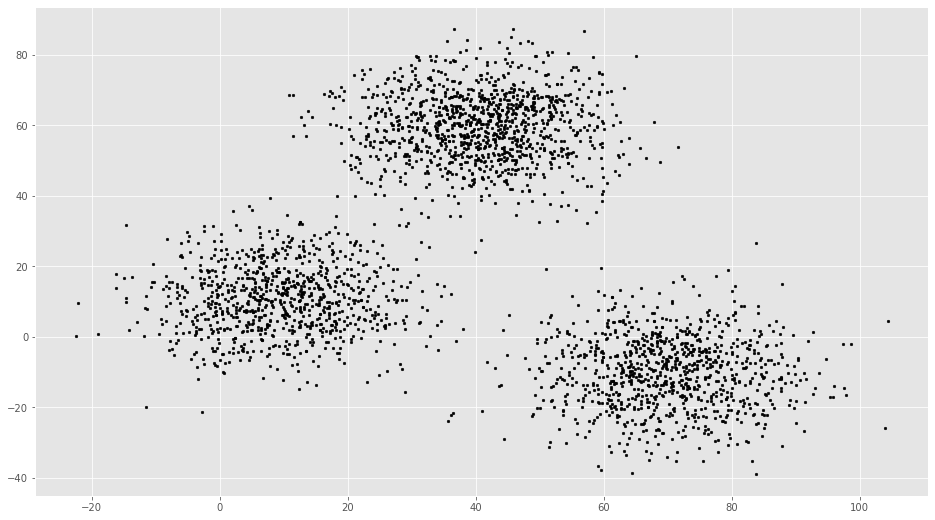

In [6]:
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=7)
plt.show()

In [7]:
##.......max gen..........##
maxgen=10

##.......no of cluster...... ###
k=3

In [8]:
###.......firefly creation...........##
NF=5
F=np.zeros((NF,k,2), dtype=np.float64)


for i in range(NF):
    C_x = np.random.randint(0, 200, size=k)
    C_y = np.random.randint(0, 200, size=k)
    Y = np.array(list(zip(C_x, C_y)), dtype=np.float32)
    F[i]=Y

print("Initial firefly")
print(F)


Initial firefly
[[[172.  29.]
  [150. 103.]
  [102.  41.]]

 [[163.  85.]
  [ 12.   8.]
  [199. 185.]]

 [[112. 157.]
  [145.  81.]
  [ 26. 171.]]

 [[174. 198.]
  [ 77. 106.]
  [ 13.  79.]]

 [[116. 103.]
  [ 96. 129.]
  [154. 127.]]]


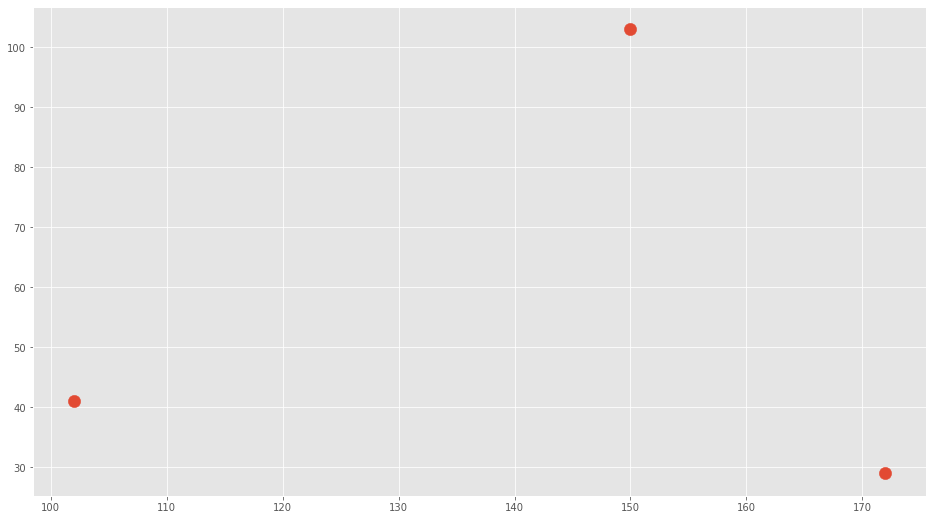

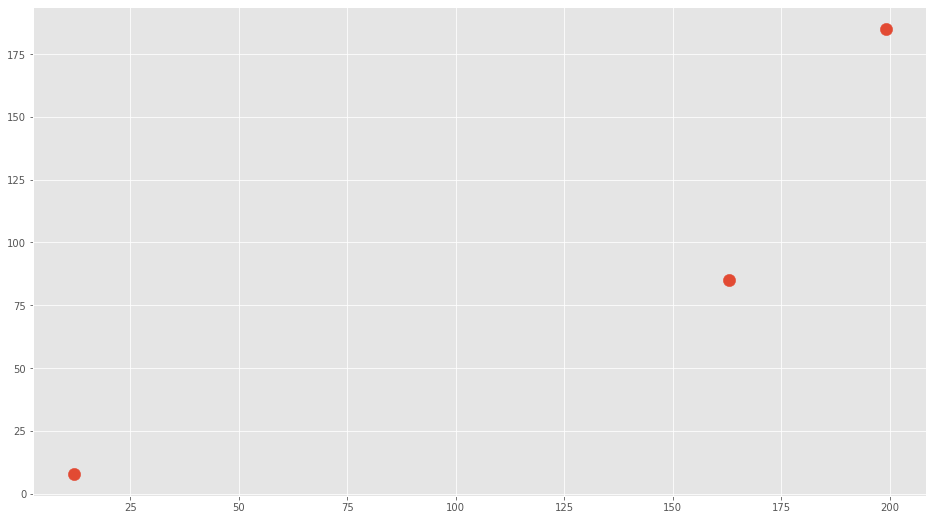

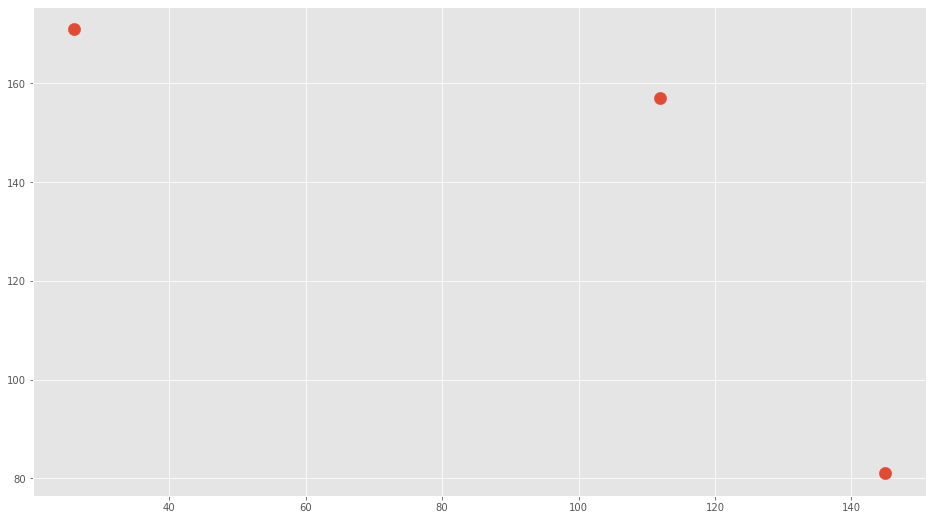

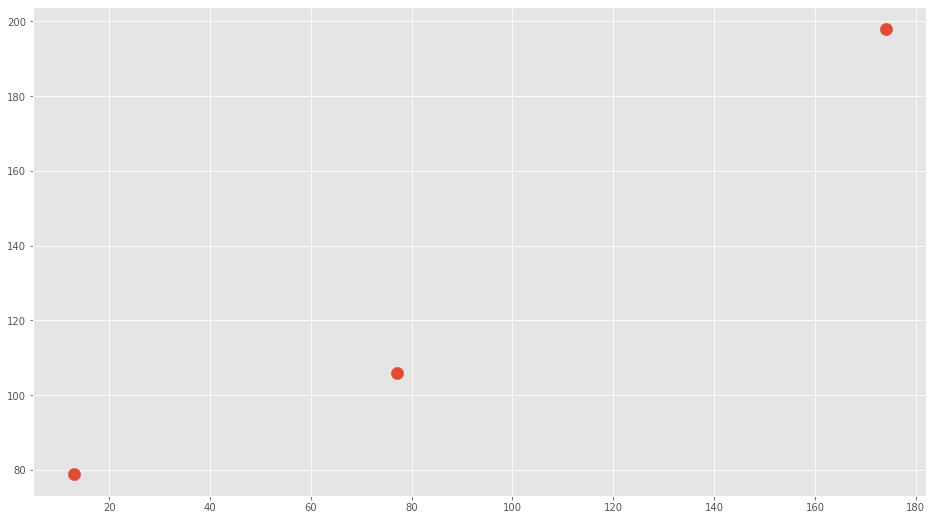

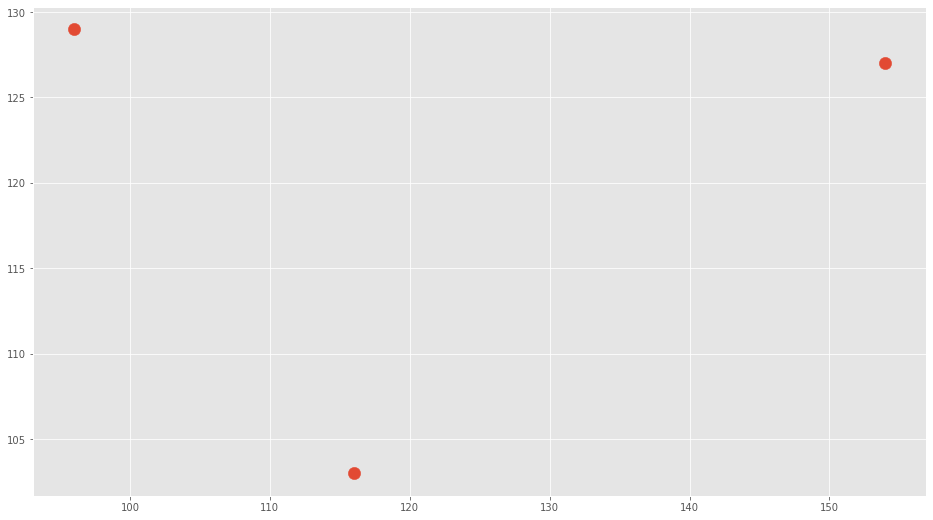

In [9]:

####.......plotting firefly..........#####


for i in range(NF):
    plt.scatter(F[i][:,0],F[i][:,1], label='True Position',s=150)
    plt.show()


In [10]:
#####......objective function calculation...........####

J=np.zeros((NF), dtype=np.float64)

def cal_objective(num):
    arr = np.ones((Z, k), dtype=np.float64)
    for j in range(Z):
        for i in range(k):
            try:
              dis = math.sqrt(((float(X[j][0] )- F[num][i][0]) ** 2) + ((float(X[j][1]) - F[num][i][1]) ** 2))
              arr[j][i] = dis
            except ValueError:
                continue


    min_dist_clus0 = np.ones((Z), dtype=np.float64)  # stores the nearest cluster distance

    for j in range(Z):
        min = 0
        val=0
        for i in range(k):
            if arr[j][i] < arr[j][min]:
                    val = arr[j][i]
                    min = i

        min_dist_clus0[j] = val



    sum=0
    for i in range(Z):
        sum=sum+min_dist_clus0[i]

    J[num]=math.sqrt(sum)
    return J[num]

for i in range(NF):
    J[i]=cal_objective(i)

print(J)


[469.89592711 373.24340365 607.39130407 450.94868692 175.93863936]


In [11]:
####.........parameter for firefly algorithm............#####


beta = 0
beta_0 = 1
gamma = 1
alpha = 0.5


In [12]:
####...........Best Firefly Calculation...........#######

obj=[]
for gen in range(maxgen):
    for i in range(5):
        scale = abs((UB[0] - LB[0])+(UB[1]-UB[1]))
        for j in range(5):
            if(J[i]>J[j]):
                r=0
                for l in range(k):
                    r=r+(F[i][l][0] - F[j][l][0]) + (F[i][l][1] - F[j][l][1])
                r = abs(r)
                r = math.sqrt(r)
                betamin=0.2
                gamma=1.0
                beta0 = 1.0
                beta = (beta0 - betamin) * \
                       math.exp(-gamma * math.pow(r, 2.0)) + betamin
                beta = beta_0 * (exp(-gamma) * (r** 2))
               # print(beta)
                for l in range(k):
                    r = random.uniform(0, 1)
                    tmpf = alpha * (r - 0.5) * scale
                    F[i][l][0] = F[i][l][0] * (1.0 - beta) +F[j][l][0] * beta + tmpf
                    F[i][l][1] = F[i][l][1] * (1.0 - beta) + F[j][l][1] * beta + tmpf

            temp = np.zeros((k, 2), dtype=np.float64)
            temp = F[i]
            for l in range(k):
                for s in range(2):
                    if temp[l][s] < LB[s]:
                        temp[l][s] = random.uniform(LB[s],UB[s])

                    if temp[l][s] > UB[s]:
                        temp[l][s] = random.uniform(LB[s],UB[s])


            F[i] = temp
            arr = np.zeros((Z, k), dtype=np.float64)
            for n in range(Z):
                for m in range(k):
                    try:

                        dis = math.sqrt(((float(X[n][0]) - F[i][m][0]) ** 2) + ((float(X[n][1]) - F[i][m][1]) ** 2))
                        arr[n][m] = dis
                    except ValueError:
                        continue
            min_dist_clus = np.zeros((Z), dtype=np.float64)
            for n in range(Z):
                min = 0
                val=0
                for m in range(k):
                    if arr[n][m] < arr[n][min]:
                            val = arr[n][m]
                            min= m

                min_dist_clus[n] = val

            sum = 0
            for n in range(Z):
                sum = sum + min_dist_clus[n]
            J[i]= math.sqrt(sum)

    obj.append(np.amin(J))
    for i in range(1,5):
        if(J[i-1]<J[i]):
            best=i


print("best firefly ")
print(F[best])



best firefly 
[[90.57623794 58.34898586]
 [50.57510262 61.60461538]
 [-9.08389482 68.95592842]]


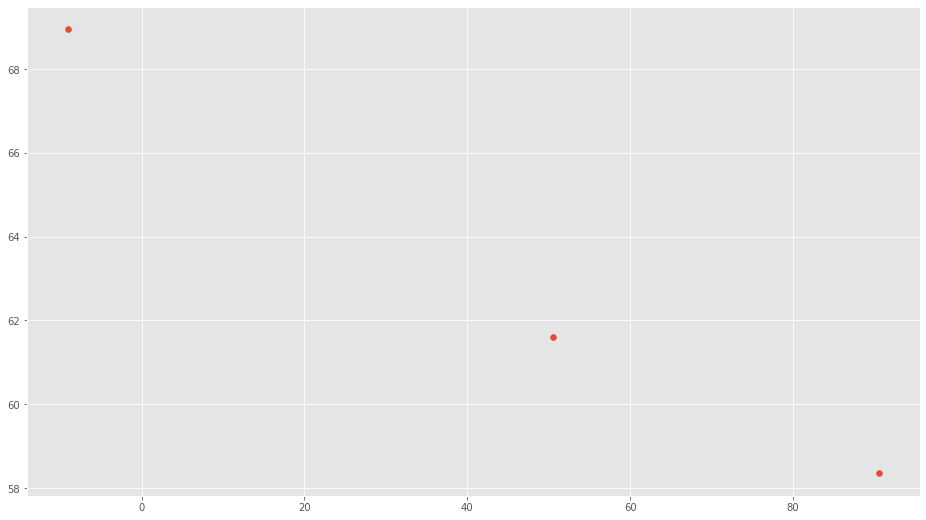

In [13]:
######...........ploting best fF(firefly)........#######

plt.scatter(F[best][:,0],F[best][:,1])
plt.show()



In [14]:
#####......... Euclidean Distance Calculator..............#####
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [15]:
############################################################
######..............K Means.......................########
###########################################################


#####..............Centroid initialization...........#######

C = F[best]
print("intitial centroid")
print(C)
C_x=[]
C_y=[]

for i in range(k):
    C_x.append(C[i][0])
    C_y.append(C[i][1])


intitial centroid
[[90.57623794 58.34898586]
 [50.57510262 61.60461538]
 [-9.08389482 68.95592842]]


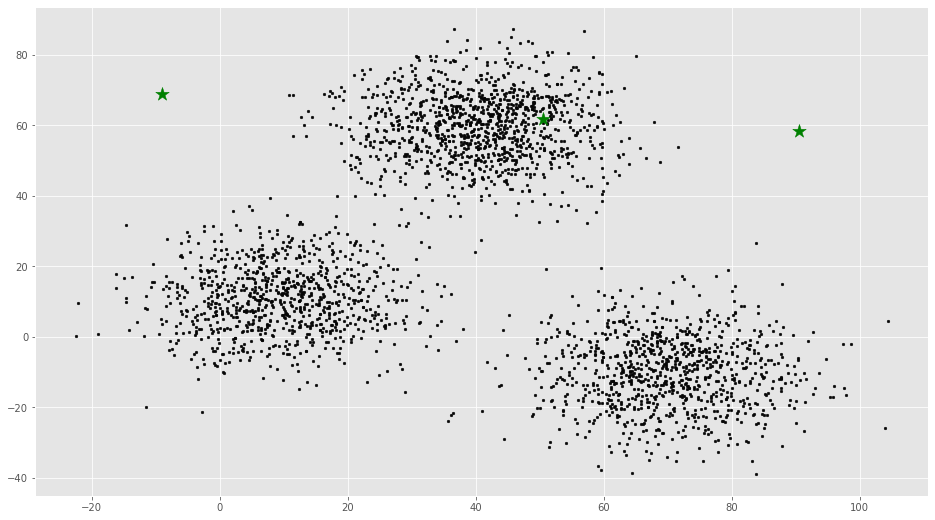

In [16]:
# #########..............Plotting along with the Centroids..................################
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
plt.show()


In [17]:
#####....... To store the value of centroids when it updates...........########
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1)
clusters = np.zeros(len(X))


In [18]:
#######......... Error func. - Distance between new centroids and old centroids.........#######
error = dist(C, C_old, None)
# Loop will run untill the error becomes zero
k_obj=[]
x_axis=[]
x_val=[]
val=200
count=0
while error != 0:
    x_axis.append(count)
    x_val.append(val)
    count += 1
    val+=1

    arr = np.ones((Z, k), dtype=np.float64)
    for j in range(Z):
        for i in range(k):
            try:
                dis = math.sqrt(((float(X[j][0]) - C[i][0]) ** 2) + ((float(X[j][1]) - C[i][1]) ** 2))
                arr[j][i] = dis
            except ValueError:
                continue

    min_dist_clus0 = np.ones((Z), dtype=np.float64)  # stores the nearest cluster distance

    for j in range(Z):
        min = 0
        val = 0
        for i in range(k):
            if arr[j][i] < arr[j][min]:
                val = arr[j][i]
                min = i

        min_dist_clus0[j] = val

    sum = 0
    for i in range(Z):
        sum = sum + min_dist_clus0[i]

    J= math.sqrt(sum)
    obj.append(J)
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster

    # Storing the old centroid values
    C_old = deepcopy(C)
    #print(C_old)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
print (C)


[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


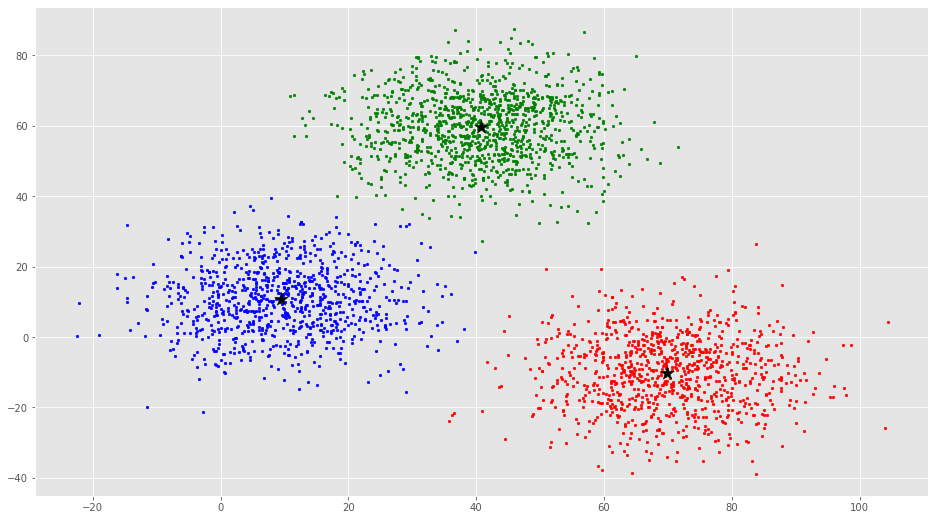

In [19]:

############............k-means plot.............##############


colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')


plt.show()

[193.45889573704477, 193.45889573704477, 152.73313642185215, 152.73313642185215, 149.54211979151208, 149.54211979151208, 133.69045145286736, 133.69045145286736, 133.69045145286736, 133.69045145286736, 304.9901576548161, 197.6080580836012, 160.1113646764808, 160.00699218542402, 160.00539554606692]
[]


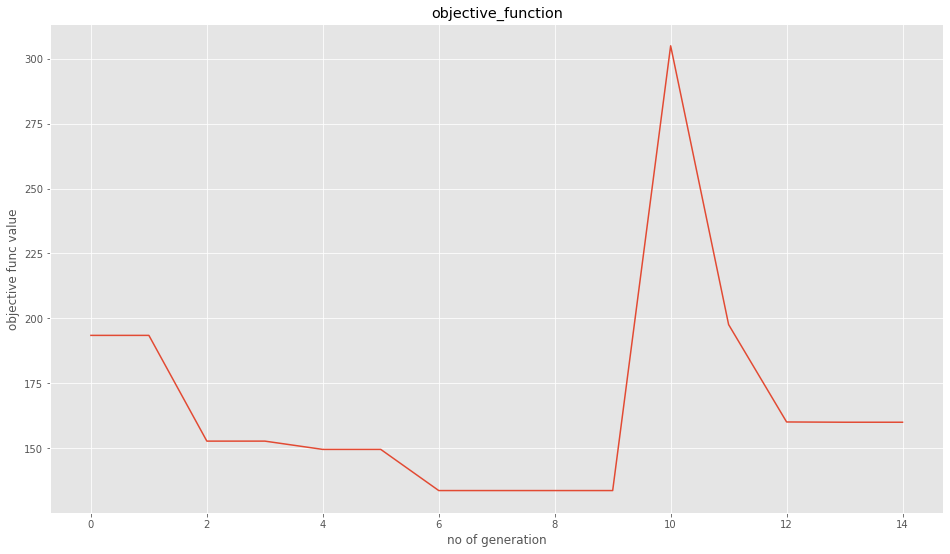

In [20]:

#############.............ploting objective function............########

print(obj)
print(k_obj)
obj_0=[]
X=[]
Y=[]
for i in range(len(obj)):
    X.append(i)
for i in range(maxgen):
    Y.append(obj[i])
plt.plot(X,obj)
plt.title('objective_function')
plt.xlabel('no of generation')
plt.ylabel('objective func value')
plt.show() 

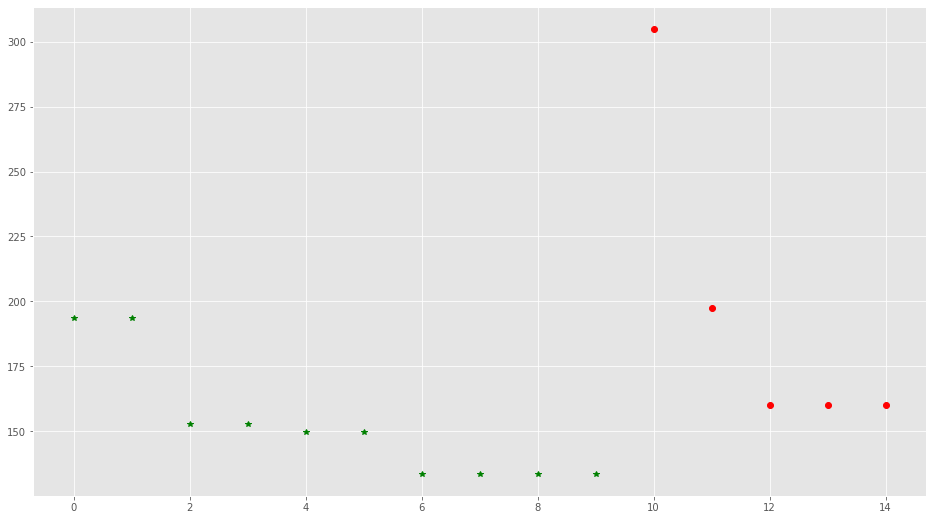

In [21]:
###########............ ploting k-means error with firefly......##########


for i in range(len(obj)):
		if(i< maxgen):
			plt.plot(i,obj[i],"g *")
		else:
			plt.plot(i,obj[i],"r o")
plt.show()